# Diffusion Model

In [1]:
from dataset import Dataset
import matplotlib.pyplot as plt
import torch
from torch.optim import Adam
from modules import Unet, Trainer
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter
import numpy as np

/home/michaelholmes/miniconda3/envs/diff/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


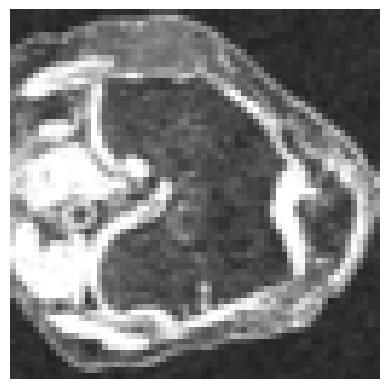

In [2]:
timesteps = 300
img_size = 64

#Create dataset from image folder
ds = Dataset("AKOA_Analysis/", img_size=img_size)

#test dataset plot for 10 selections of timesteps
plt.axis('off')
image = ds.__getitem__(2)
plt.imshow((image.numpy().T + 1) * 0.5)
plt.show()

Using Device:  cuda


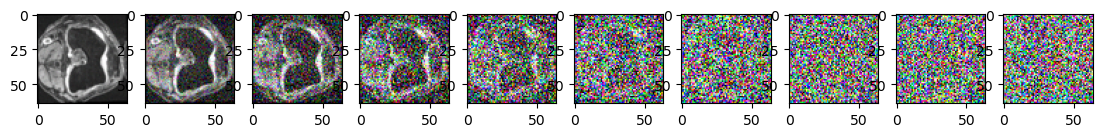

In [3]:
#Create trainer and model
trainer = Trainer(img_size=img_size, timesteps=timesteps)

#Plot images over timesteps
image = ds.__getitem__(500)
plt.figure(figsize=(15,15))
plt.axis('off')
num_images = 10
stepsize = int(timesteps/num_images)

for idx in range(0, timesteps, stepsize):
    t = torch.Tensor([idx]).type(torch.int64)
    plt.subplot(1, num_images+1, int(idx/stepsize) + 1)
    image, noise = trainer.sample_forward(image, t)
    plt.imshow(np.clip((image.cpu().numpy().T + 1) * 0.5, 0, 1))

In [12]:
#Create dataloader
batch_size = 64
dataloader = DataLoader(ds, batch_size=batch_size, shuffle=True, drop_last=True)

#Train
epochs = 100
trainer.fit(dataloader, epochs)

Epoch 0 Loss: 0.808624267578125
Epoch 1 Loss: 0.2404535412788391
Epoch 2 Loss: 0.21997272968292236
Epoch 3 Loss: 0.1996888965368271
Epoch 4 Loss: 0.18173816800117493
Epoch 5 Loss: 0.1914910525083542
Epoch 6 Loss: 0.15397638082504272


KeyboardInterrupt: 

In [4]:
trainer.load_model("autosave.pth")

In [5]:
trainer.generate_image("test.jpeg")
trainer.generate_image("test1.jpeg")

AttributeError: 'numpy.random._generator.Generator' object has no attribute 'seed'